In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset 
data = pd.read_csv('processed_data_PCA.csv')

# Separate features and target
X = data.drop('y', axis=1) 
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (36167, 53)
X_test shape: (9042, 53)


Random Forest - Training Accuracy: 0.9289407470898886
Random Forest - Test Accuracy: 0.878124308781243
Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      7951
         1.0       0.50      0.51      0.50      1091

    accuracy                           0.88      9042
   macro avg       0.71      0.72      0.72      9042
weighted avg       0.88      0.88      0.88      9042



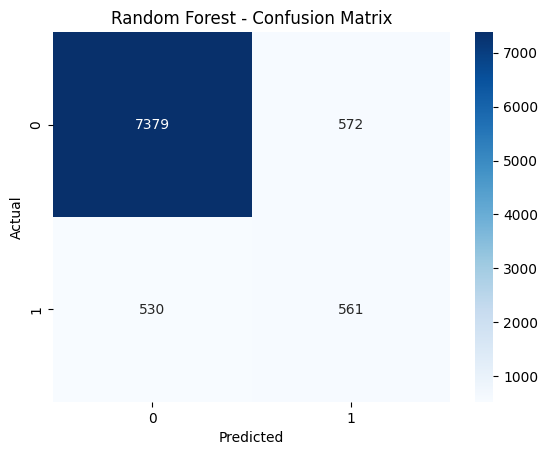

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
# rf_model = RandomForestClassifier(random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    class_weight='balanced',
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Training Accuracy:", accuracy_score(y_train, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# Get predicted probabilities for the positive class
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.7939019482414112


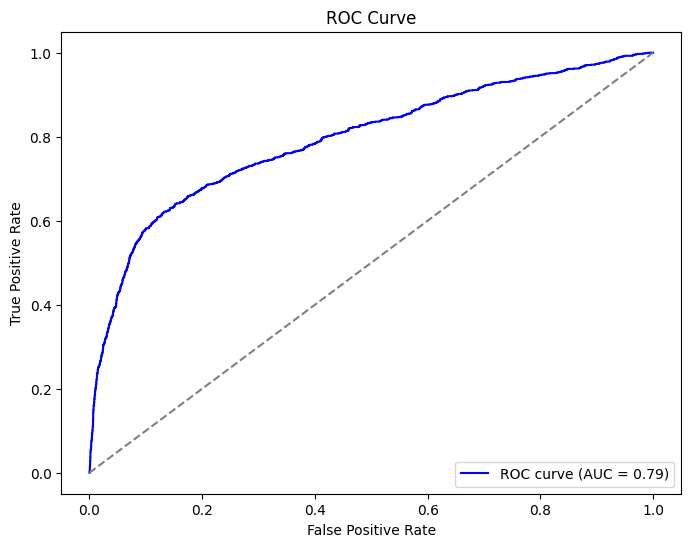

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross-Validation with 5 folds
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print(f'Cross-validation scores: {scores}')

# Print the average cross-validation score
print(f'Mean accuracy: {scores.mean()}')

Cross-validation scores: [0.88299049 0.05142668 0.18535722 0.20183588 0.14887734]
Mean accuracy: 0.29409751995878297


# Tunning

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Post-Tuning - Training Accuracy: 0.9282238442822385
Random Forest Post-Tuning - Test Accuracy: 0.8688488333517638
Random Forest Post-Tuning - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.46      0.47      0.46      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.69      9043
weighted avg       0.87      0.87      0.87      9043



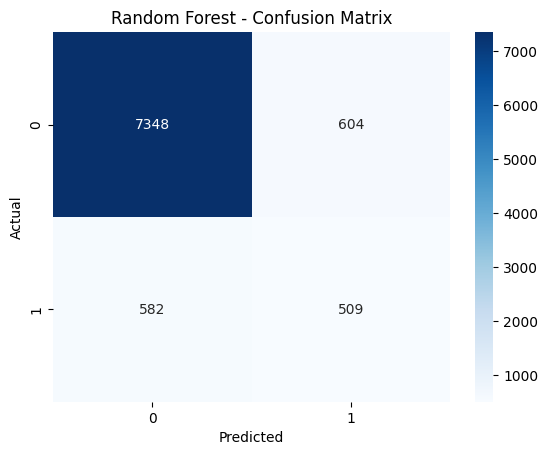

In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4 ],
    'class_weight': ['balanced', 'balanced_subsample']
}

# param_grid = {
#     'n_estimators': [100, 200, 300, 500],  # Number of trees, higher values improve performance but take longer to compute
#     'max_depth': [10, 15, 20, 25],  # Controls overfitting, deeper trees may overfit, shallower trees may underfit
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'class_weight': ['balanced', 'balanced_subsample'],  # Helps with class imbalance
#     'max_features': ['sqrt', 'log2', None],  # Limits the number of features to consider when splitting a node
#     'bootstrap': [True, False],  # Whether to use bootstrap sampling when building trees
#     'criterion': ['gini', 'entropy'],  # Splitting criterion, 'gini' generally performs better but 'entropy' can be useful in certain cases
# }



# Initialize Random Forest and GridSearch
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_


# Make predictions
rf_tune_y_pred_train = best_rf_model.predict(X_train)
rf_tune_y_pred_test = best_rf_model.predict(X_test)

# Evaluate
print("Random Forest Post-Tuning - Training Accuracy:", accuracy_score(y_train, rf_tune_y_pred_train))
print("Random Forest Post-Tuning - Test Accuracy:", accuracy_score(y_test, rf_tune_y_pred_test))

# Classification Report
print("Random Forest Post-Tuning - Classification Report:")
print(classification_report(y_test, rf_tune_y_pred_test))

## Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_tune_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
# Get predicted probabilities for the positive class
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.785103033415894


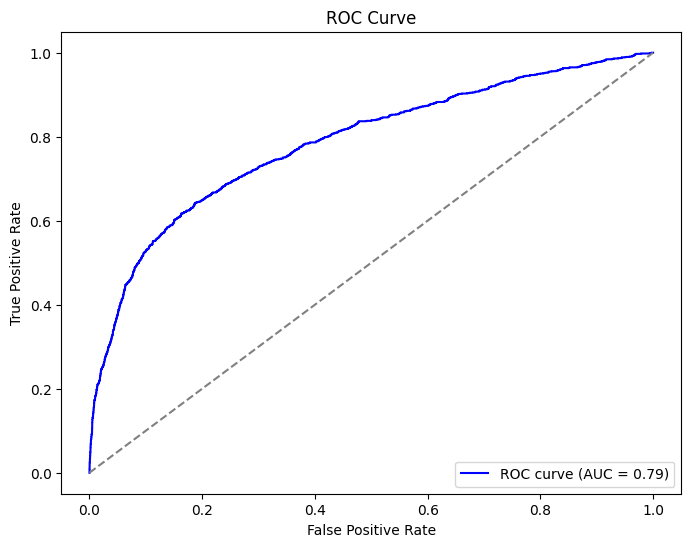

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross-Validation with 5 folds
scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print(f'Cross-validation scores: {scores}')

# Print the average cross-validation score
print(f'Mean accuracy: {scores.mean()}')

Cross-validation scores: [0.87780604 0.05773059 0.17319177 0.20305242 0.16832559]
Mean accuracy: 0.29602128276846235
